# Visualizing earnings based on College Majors
In this project we will explore job outcomes of students who graduated between 2010 and 2012. The data was originally released by [American Community Survey](https://www.census.gov/programs-surveys/acs/) but was then cleaned by FiveThirtyEight and released on their [github-repo](https://github.com/fivethirtyeight/data/tree/master/college-majors), which is what we'll be working with. Each row represent a different major and includes data on median salary, employment rates, share of women and more.

We'll be exploring questions like:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

Let's start by importing our necessary modules; pandas and matplotlib. Let's also read in our data set into a dataframe, print the first and the last rows to get a feel for how the data i structured and `describe()` the dataframe to get a short summary statistics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.head(5))
print(recent_grads.tail(5))
recent_grads.describe()

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Let's also call `info()` to see how many missing values we're dealing with:

In [2]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

As you can see, there are only a few missing values. Likely, it's a single row that contributes with most of these missing values. In this case, let's just remove the rows containing such values, using the `dropna()`-function.

In [3]:
recent_grads = recent_grads.dropna()
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

Comparing this output with earlier, we can see that our intuition was correct; Only one row included missing values and is now removed. Our 173 entry data set has now been reduced to 172 entries.

## Exploring relationships through scatter plots
Let's create some scatter plots for different pairs of columns to try and spot underlying patterns.

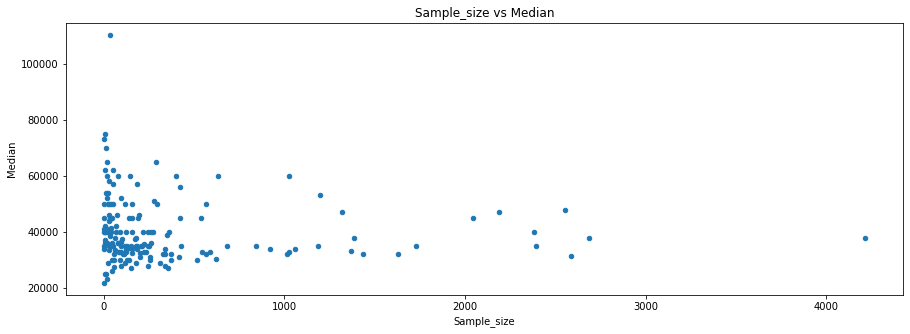

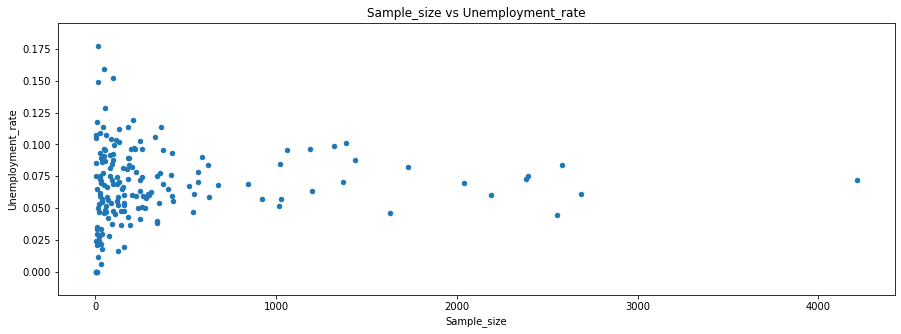

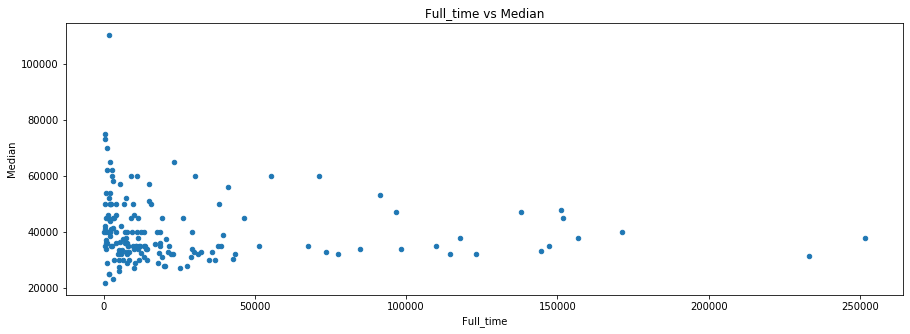

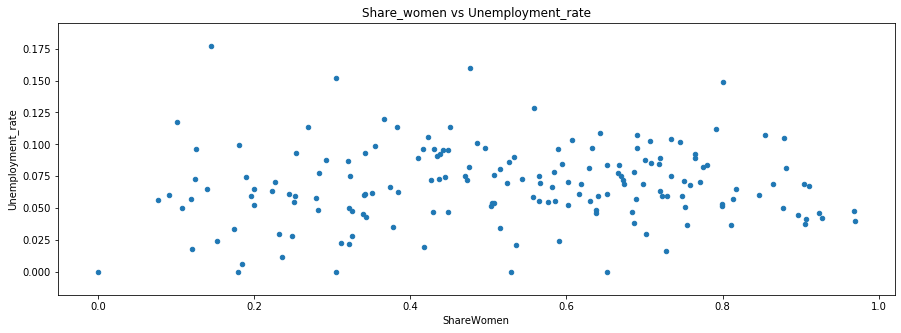

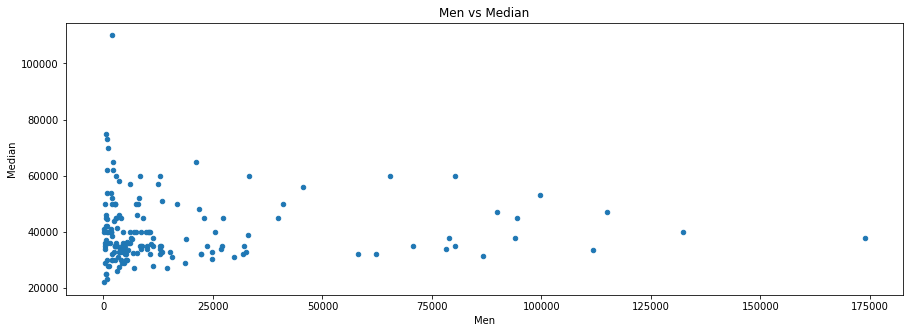

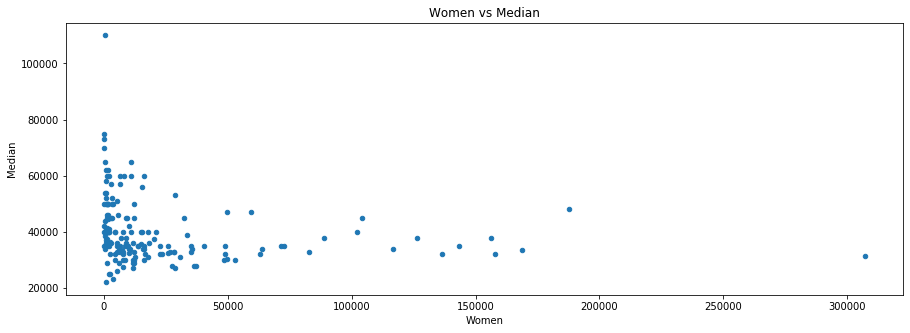

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample_size vs Median', figsize=(15,5))
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size vs Unemployment_rate', figsize=(15,5))
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs Median', figsize=(15,5))
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share_women vs Unemployment_rate', figsize=(15,5))
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs Median', figsize=(15,5))
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs Median', figsize=(15,5))

The plots utilizing 'Sample_size' really only say one major thing; The distribution of the Median and Unemployment rate respectively narrows when the sample size increases. This is of course to be expected. We can't reeally discern any other pattern besides that from these.

The same kind off applies to the number of full time workers vs median salary plot. What we can see is that the spread becomes less prevalent when full time increases. It is at very low number of full times where we see the extremely low and high median salaries, which is not very surprising.

The share of women enrolled in a major doesn't seem to have a significant effect on the resulting unemployment rate after graduation.

When it comes to median salary, the plots for men and women look fairly similar, which is to be expected. ALthough, we do notice som tendancies for men to have higher median salaries after graduation.

## Exploring distribution
We will now create histograms to explore the distribution of the data. We can utilize the `Series.plot()`-function with parameter kind='hist', although that doesn't allow for much customization. We can instead use the `Series.hist()`-function.

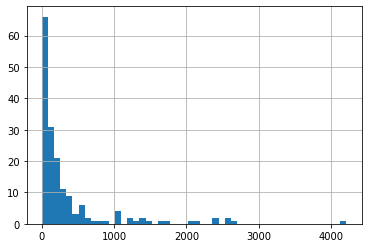

In [16]:
recent_grads['Sample_size'].hist(bins=50)

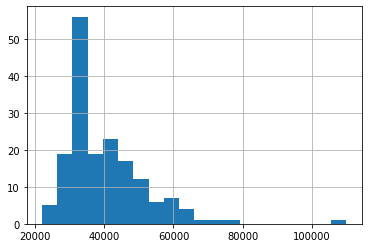

In [30]:
recent_grads['Median'].hist(bins=20)

The most common median salary seems to be around 31,000-36,000$ annually.

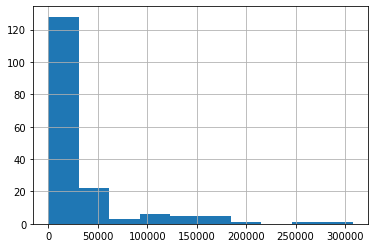

In [21]:
recent_grads['Employed'].hist(bins=10)

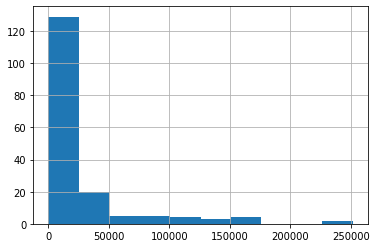

In [22]:
recent_grads['Full_time'].hist(bins=10)

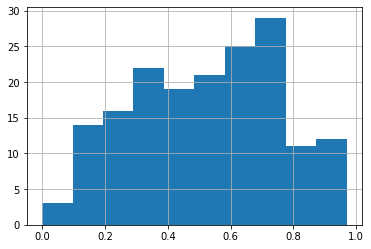

In [31]:
recent_grads['ShareWomen'].hist(bins=10)

There appears to be around 55-60% of the majors that are dominated by women.

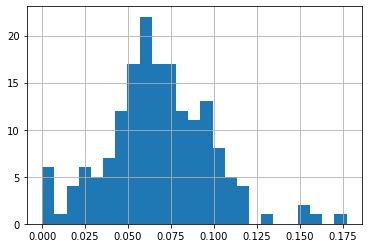

In [25]:
recent_grads['Unemployment_rate'].hist(bins=25)

The unemployment rate appears to be fairly normally distributed around 6%.

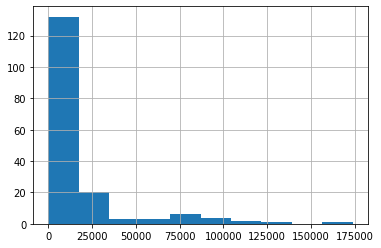

In [26]:
recent_grads['Men'].hist(bins=10)

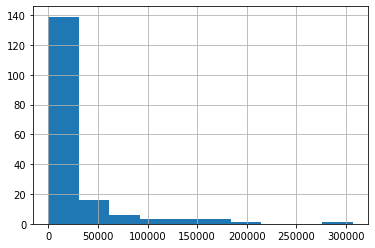

In [27]:
recent_grads['Women'].hist(bins=10)

## Matrix plots
Let's create plots combining scatter plots and histograms. Pandas includes a function `scatter_matrix()` that can achieve this. It is part of the `plotting` module and needs to be imported seperately.

In [32]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EFB74DF88>,
      dtype=object)

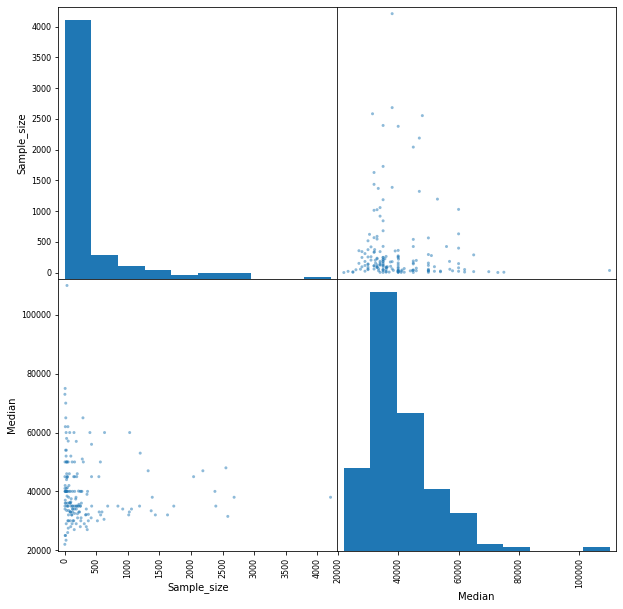

In [33]:
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EFB959408>,
      dtype=object)

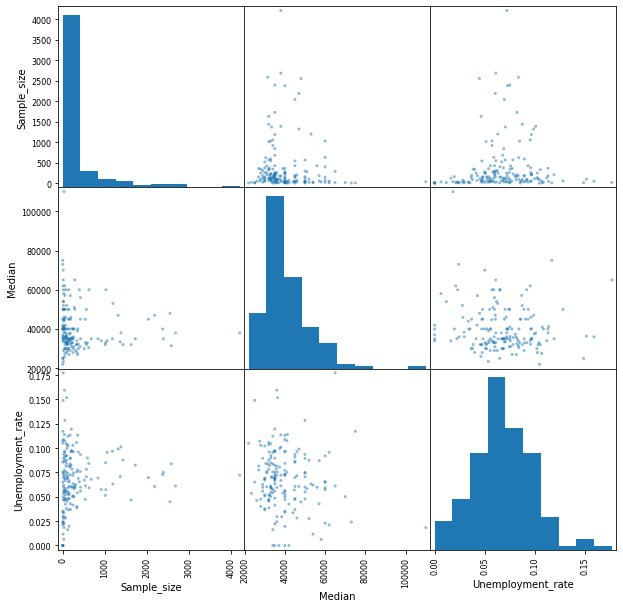

In [34]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

As is apparent, we can gain a lot of the previously drawn insights from just the last plot alone. Matrix plots are an efficient way of quickly gaining insights.

## Bar plots
Let's finish off by doing some bar plots.

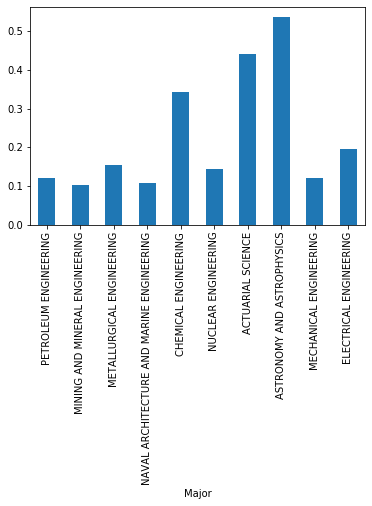

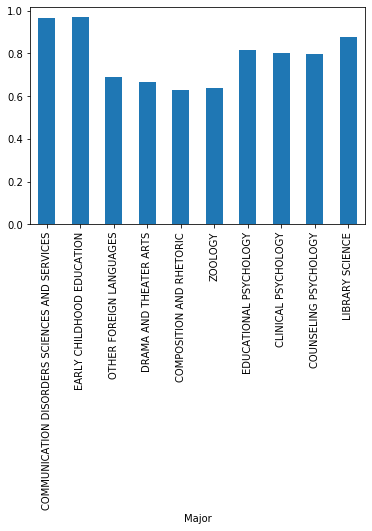

In [39]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

From the above plots we can easily observe how different majors have different gender distributions.

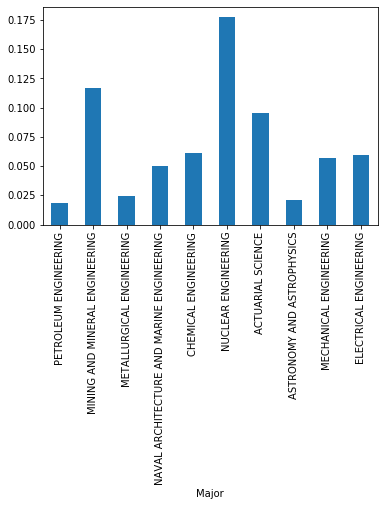

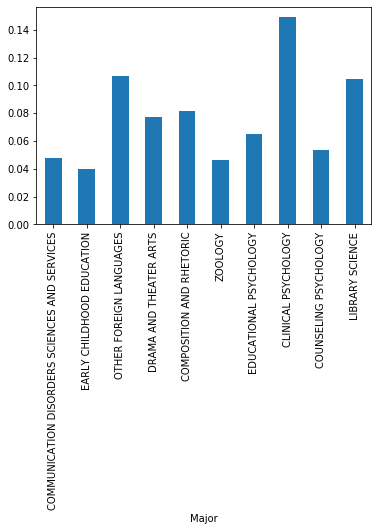

In [40]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)